In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Custom modules
from modules import dataset

sns.set_theme(style="darkgrid")

output_dir = "images"

In [2]:
ds = dataset.Dataset("NiV_Data_2001_2024.xlsx")

df = ds.get_df()

df

,Year,Max T,Min T,Rainfall,Humidity,Dry-Bulb T,Infected,Death
2001,2001,33.24,18.28,139.92,73.42,25.94,16,11
2002,2002,33.44,17.68,156.25,73.17,25.82,0,0
2003,2003,33.52,18.08,141.08,73.67,25.75,15,10
2004,2004,33.55,18.02,195.58,72.67,25.88,65,48
2005,2005,33.67,18.73,219.75,72.83,26.24,17,16
2006,2006,34.62,18.65,159.92,71.42,26.47,0,0
2007,2007,33.90,18.29,240.42,73.17,25.71,18,9
2008,2008,33.67,18.34,184.75,73.42,25.88,11,7
2009,2009,34.66,18.68,160.92,70.25,26.52,7,2
2010,2010,34.24,19.12,126.92,70.42,26.58,18,16


In [3]:
from modules import arima

MAE: 8.95
RMSE: 9.44


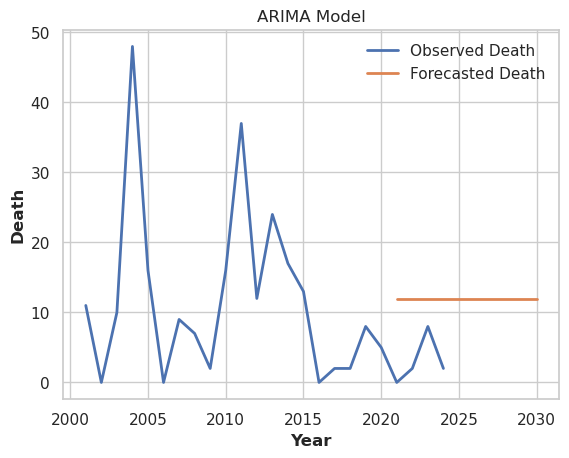

In [4]:
model = arima.ARIMA(ds)

model.generate_results("Death")

MAE: 12.10
RMSE: 12.63


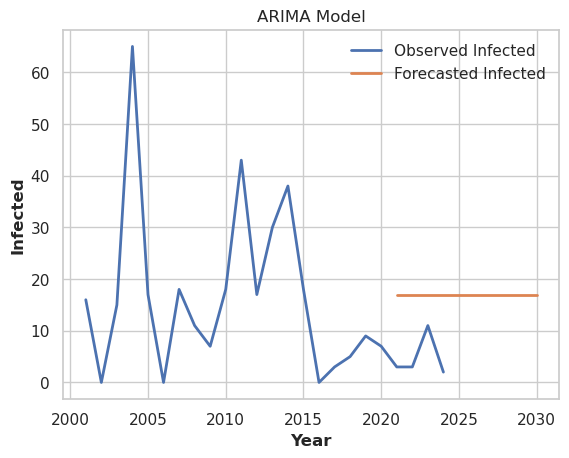

In [5]:
model.generate_results("Infected")

In [6]:
from modules import exponential

MAE: 4.11
RMSE: 5.13


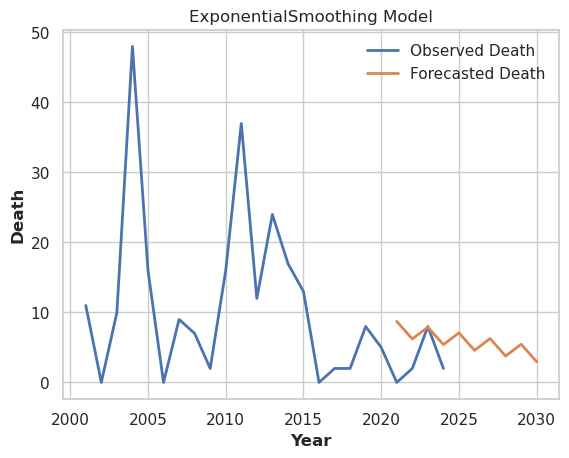

In [7]:
model = exponential.ExponentialSmoothingWrapper(ds)

model.generate_results("Death")

MAE: 5.91
RMSE: 6.78


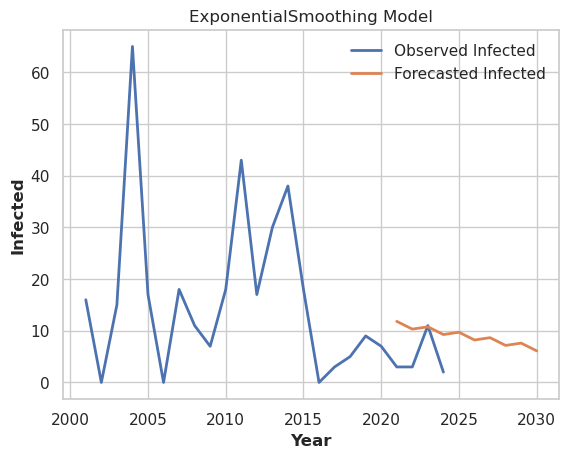

In [8]:
model.generate_results("Infected")

08:30:56 - cmdstanpy - INFO - Chain [1] start processing
08:30:56 - cmdstanpy - INFO - Chain [1] done processing


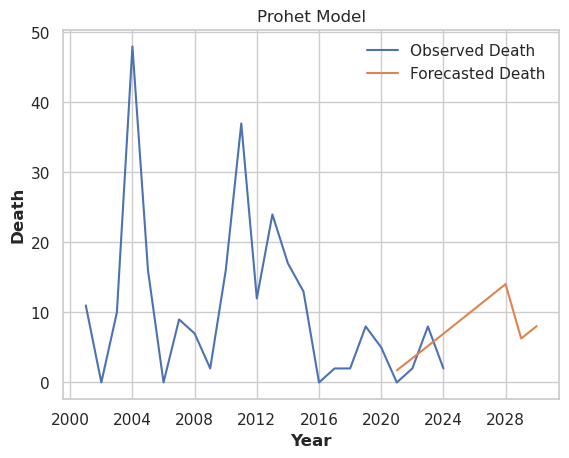

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load data
df = dataset.Dataset("NiV_Data_2001_2024.xlsx").get_df()

# Format columns
df["Year"] = pd.to_datetime(df["Year"], format="%Y")
df = df.rename(columns={"Year": "ds", "Death": "y"})

# Fit the Prophet model
model = Prophet()
model.fit(df)

# Make predictions
future = model.make_future_dataframe(periods=6, freq="Y")
forecast = model.predict(future)

# Plotting using matplotlib
plt.plot(df["ds"], df["y"], label="Observed Death")
plt.plot(forecast["ds"][20:], forecast["yhat"][20:], label="Forecasted Death")
plt.title("Prohet Model")

plt.xlabel("Year")
plt.ylabel("Death")
plt.legend()

# Save the plot
output_path = os.path.join(output_dir, "prophet_forecast_death.eps")
plt.savefig(output_path, dpi=220, format="eps")

output_path = os.path.join(output_dir, "prophet_forecast_death.png")
plt.savefig(output_path, dpi=220, format="png")

plt.show()

In [10]:
# Calculate RMSE and MAE
from sklearn.metrics import mean_absolute_error, mean_squared_error


y_true = df["y"].values  # Actual values
y_pred = forecast["yhat"].values  # Predicted values

# Compute RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_true, y_pred[:24]))
mae = mean_absolute_error(y_true, y_pred[:24])

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 10.70
MAE: 7.92


08:30:57 - cmdstanpy - INFO - Chain [1] start processing
08:30:57 - cmdstanpy - INFO - Chain [1] done processing


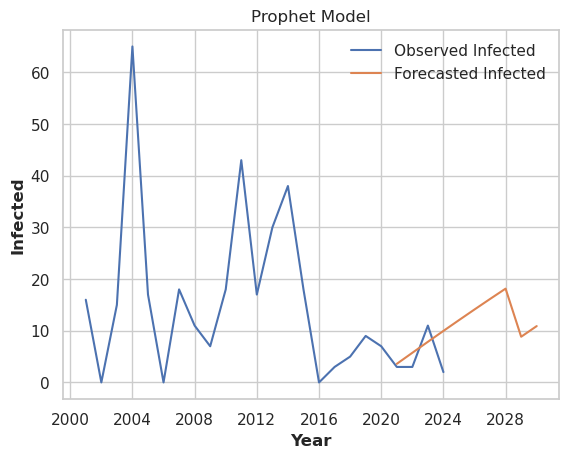

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load data
df = dataset.Dataset("NiV_Data_2001_2024.xlsx").get_df()

# Format columns
df["Year"] = pd.to_datetime(df["Year"], format="%Y")
df = df.rename(columns={"Year": "ds", "Infected": "y"})

# Fit the Prophet model
model = Prophet()
model.fit(df)

# Make predictions
future = model.make_future_dataframe(periods=6, freq="Y")
forecast = model.predict(future)

# Plotting using matplotlib
plt.plot(df["ds"], df["y"], label="Observed Infected")
plt.plot(forecast["ds"][20:], forecast["yhat"][20:], label="Forecasted Infected")
plt.title("Prophet Model")

plt.xlabel("Year")
plt.ylabel("Infected")
plt.legend()

# Save the plot
output_path = os.path.join(output_dir, "prophet_forecast_infected.eps")
plt.savefig(output_path, dpi=220, format="eps")

output_path = os.path.join(output_dir, "prophet_forecast_infected.png")
plt.savefig(output_path, dpi=220, format="png")

plt.show()

In [12]:
# Calculate RMSE and MAE
from sklearn.metrics import mean_absolute_error, mean_squared_error


y_true = df["y"].values  # Actual values
y_pred = forecast["yhat"].values  # Predicted values

# Compute RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_true, y_pred[:24]))
mae = mean_absolute_error(y_true, y_pred[:24])

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 14.12
MAE: 10.02


In [1]:
import pandas as pd

df = pd.read_excel("dengue_data.xlsx")

df

,Days,T mean,P mean,MeanRH,MeanSM,MeanVP,MeanWS,MeanWG,DI
0,1,19.755249,0.0,50.708332,0.204458,13.083111,2.645221,4.675000,2
1,2,20.192750,0.0,50.500000,0.213625,13.185005,2.171525,3.979167,7
2,3,20.219831,0.0,49.333332,0.210583,13.454900,2.224106,4.012500,4
3,4,19.987331,0.0,48.958332,0.199792,13.416596,2.440806,4.687499,2
4,5,20.111082,0.0,48.541668,0.197875,13.678500,2.263300,4.204167,2
...,...,...,...,...,...,...,...,...,...
360,361,22.523996,0.0,60.791668,0.165250,12.866817,3.091285,5.912500,35
361,362,21.610666,0.0,53.333332,0.163333,13.416490,2.363047,4.175000,36
362,363,18.371082,0.0,35.541668,0.166000,14.616329,2.099971,4.154166,18
363,364,18.787334,0.0,43.000000,0.190125,12.989778,1.329667,2.170833,6


In [3]:
df.to_csv("dengue_data.csv", index=False)

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from statsmodels.discrete.discrete_model import Poisson
from statsmodels.discrete.discrete_model import NegativeBinomial

# Load the data
data = pd.read_csv('dengue_data.csv')

# Extract variables and name them
y = data['DI']
x1 = data['T mean']
x2 = data['Min_T']
x3 = data['Max_T']
x4 = data['Precipitation']
x5 = data['Pop_Bangladesh']
x6 = data['Urban']
x7 = data['Rural']
x8 = data['Pop_density']

# Change scale of variables for numerical stability
log_x4 = np.log(x4)
log_x5 = np.log(x5)
log_x6 = np.log(x6)
log_x7 = np.log(x7)
log_x8 = np.log(x8)

# Descriptive statistics of count and explanatory variables
print("Descriptive statistics:")
print("y:", y.describe())
print("x1:", x1.describe())
print("x2:", x2.describe())
print("x3:", x3.describe())
print("log_x4:", log_x4.describe())
print("log_x5:", log_x5.describe())
print("log_x6:", log_x6.describe())
print("log_x7:", log_x7.describe())
print("x8:", x8.describe())

# Produce histogram of count variable to know the shape
plt.hist(y, bins=25)
plt.xlabel("Infected Cases")
plt.title("Histogram of count")
plt.show()

# Checking mean and variance
print("Mean of y:", y.mean())
print("Variance of y:", y.var())
print("Variance/Mean of y:", y.var() / y.mean())

# Producing pairwise correlation along with smooth fitted line
corr_matrix = data.corr()
print("Correlation matrix:")
print(corr_matrix)

# Creating Data frame
data_frame = pd.DataFrame({
    'Infected_Cases': y,
    'Mean_temperature': x1,
    'Min_temperature': x2,
    'Max_temperature': x3,
    'log_Precipitation': log_x4,
    'log_Total_population': log_x5,
    'log_Urban': log_x6,
    'log_Rural': log_x7,
    'Population_density': x8
})

# Fitting Poisson and NB Regression Model
X = data_frame[['Mean_temperature', 'Min_temperature', 'Max_temperature', 'log_Precipitation', 'log_Total_population', 'log_Urban', 'log_Rural', 'Population_density']]
y = data_frame['Infected_Cases']

poisson_model = Poisson(y, X).fit()
print("Poisson model summary:")
print(poisson_model.summary())

nb_model = NegativeBinomial(y, X).fit()
print("Negative Binomial model summary:")
print(nb_model.summary())

# Goodness-of-fit of Poisson Regression
aic_poisson = poisson_model.aic
print("AIC of Poisson model:", aic_poisson)

# Pearson Residual
pearson_residual_poisson = (poisson_model.resid_pearson ** 2).sum()
df_poisson = poisson_model.df_resid
print("Pearson residual of Poisson model:", pearson_residual_poisson)
print("DF of Poisson model:", df_poisson)

# Dispersion
dispersion_poisson = pearson_residual_poisson / df_poisson
print("Dispersion of Poisson model:", dispersion_poisson)

# Pseudo-R2
pseudo_r2_poisson = 1 - poisson_model.deviance / poisson_model.null_deviance
print("Pseudo-R2 of Poisson model:", pseudo_r2_poisson)

# Goodness-of-fit of NB Regression
aic_nb = nb_model.aic
print("AIC of Negative Binomial model:", aic_nb)

# Pearson Residual
pearson_residual_nb = (nb_model.resid_pearson ** 2).sum()
df_nb = nb_model.df_resid
print("Pearson residual of Negative Binomial model:", pearson_residual_nb)
print("DF of Negative Binomial model:", df_nb)

# Dispersion
dispersion_nb = pearson_residual_nb / df_nb
print("Dispersion of Negative Binomial model:", dispersion_nb)

# Pseudo-R2
pseudo_r2_nb = 1 - nb_model.deviance / nb_model.null_deviance
print("Pseudo-R2 of Negative Binomial model:", pseudo_r2_nb)

KeyError: 'Mean_T'

In [5]:
print(data.columns)

Index(['Days', 'T mean', 'P mean', 'MeanRH', 'MeanSM', 'MeanVP', 'MeanWS',
       'MeanWG', 'DI'],
      dtype='object')
